# Systems of Nonlinear Equations
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

# Example 1

A system of nonlinear equations consists of several nonlinear functions - as many as there are unknowns. Solving a system of nonlinear equations means funding those points where the functions intersect each other. Consider for example the following system of equations
\begin{equation}
y = 4x - 0.5 x^3
\end{equation}
\begin{equation}
y = \sin(x)e^{-x}
\end{equation}

The first step is to write these in residual form
\begin{equation}
f_1 = y - 4x + 0.5 x^3,\\
f_2 = y -  \sin(x)e^{-x}
\end{equation}


In [1]:
import numpy as np
from numpy import cos, sin, pi, exp
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

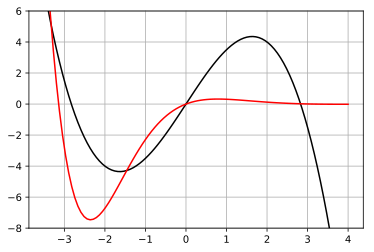

In [2]:
y1 = lambda x: 4 * x - 0.5 * x**3
y2 = lambda x: sin(x)*exp(-x)
x = np.linspace(-3.5,4,100)
plt.ylim(-8,6)
plt.plot(x,y1(x), 'k')
plt.plot(x,y2(x), 'r')
plt.grid()
plt.savefig('example1.pdf')

In [3]:
def F(xval):
    x = xval[0] # let the first value in xval denote x
    y = xval[1] # let the second value in xval denote y
    f1 = y - 4.0*x + 0.5*x**3 # define f1
    f2 = y - sin(x)*exp(-x) # define f2
    return np.array([f1,f2]) # must return an array 


def J(xval):
    x = xval[0]
    y = xval[1]
    return np.array([[1.5*x**2 - 4.0 , 1.0 ],
                      [-cos(x)*exp(-x) + sin(x)*exp(-x) , 1.0]]) # Jacobian matrix J = [[df1/dx, df1/dy], [df2/dx,df2/dy]]

In [4]:
guess = np.array([1,3])
F(guess)

array([-0.5       ,  2.69044012])

In [5]:
J(guess)

array([[-2.5       ,  1.        ],
       [ 0.11079377,  1.        ]])

In [6]:
def newton_solver(F, J, x, tol): # x is nothing more than your initial guess
    F_value = F(x)
    err = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
#     err = tol + 100
    niter = 0
    while abs(err) > tol and niter < 100:
        J_value = J(x)
        delta = np.linalg.solve(J_value, - F_value)
        x = x + delta  # update the solution
        F_value = F(x) # compute new values for vector of residual functions
        err = np.linalg.norm(F_value, ord=2) # compute error norm (absolute error)
        niter += 1

    # Here, either a solution is found, or too many iterations
    if abs(err) > tol:
        niter = -1
        print('No Solution Found!!!!!!!!!')
    return x, niter, err

Try to find the root less than [-2,-4]

In [10]:
tol = 1e-8
xguess = np.array([-3,0])
roots, n, err = newton_solver(F,J,xguess,tol)
print ('# of iterations', n, 'roots:', roots)
print ('Error Norm =',err)

# of iterations 5 roots: [-3.32550287  5.08630572]
Error Norm = 1.4015965240388036e-09


In [11]:
F(roots)

array([-2.51535681e-10, -1.37884104e-09])

Use Python's fsolve routine

In [12]:
fsolve(F,xguess)

array([-3.32550287,  5.08630571])

# Example 2
Find the roots of the following system of equations
\begin{equation}
x^2 + y^2 = 1, \\
y = x^3 - x + 1
\end{equation}
First we assign $x_1 \equiv x$ and $x_2 \equiv y$ and rewrite the system in residual form
\begin{equation}
f_1(x_1,x_2) = x_1^2 + x_2^2 - 1, \\
f_2(x_1,x_2) = x_1^3 - x_1 - x_2 + 1
\end{equation}


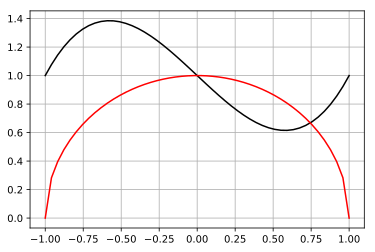

In [39]:
x = np.linspace(-1,1)
y1 = lambda x: x**3 - x + 1
y2 = lambda x: np.sqrt(1 - x**2)
plt.plot(x,y1(x), 'k')
plt.plot(x,y2(x), 'r')
plt.grid()

In [33]:
def F(xval):
    ?
    
def J(xval):
    ?

In [31]:
tol = 1e-8
xguess = np.array([0.5,0.5])
x, n, err = newton_solver(F, J, xguess, tol)
print (n, x)
print ('Error Norm =',err)

6 [0.74419654 0.66796071]
Error Norm = 4.965068306494546e-16


In [32]:
fsolve(F,(0.5,0.5))

array([0.74419654, 0.66796071])

In [40]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()
